In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

plt.rcParams["figure.figsize"] = (9,5)

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import make_scorer

from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression


from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ClassPredictionError

In [5]:
raisin=pd.read_excel("Raisin_Dataset.xlsx")
raisin

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0    87524       442.246011       253.291155      0.819738       90546   
1    75166       406.690687       243.032436      0.801805       78789   
2    90856       442.267048       266.328318      0.798354       93717   
3    45928       286.540559       208.760042      0.684989       47336   
4    79408       352.190770       290.827533      0.564011       81463   
..     ...              ...              ...           ...         ...   
895  83248       430.077308       247.838695      0.817263       85839   
896  87350       440.735698       259.293149      0.808629       90899   
897  99657       431.706981       298.837323      0.721684      106264   
898  93523       476.344094       254.176054      0.845739       97653   
899  85609       512.081774       215.271976      0.907345       89197   

       Extent  Perimeter    Class  
0    0.758651   1184.040  Kecimen  
1    0.684130   1121.786  Kecimen  
2    0.637613   1208.575  Kecimen  
3    0.699599    844.162  Kecimen  
4    0.792772   1073.251  Kecimen  
..        ...        ...      ...  
895  0.668793   1129.072    Besni  
896  0.636476   1214.252    Besni  
897  0.741099   1292.828    Besni  
898  0.658798   1258.548    Besni  
899  0.632020   1272.862    Besni  

[900 rows x 8 columns]

In [6]:
def SuperInfo(df, dropna=False):
    """
    Returns a dataframe consisting of datatypes, nuniques, #s of nulls head(1), most frequent item and its frequncy,
    where the column names are indices.
    """
    dt=pd.DataFrame(df.dtypes, columns=["Type"])
    dn=pd.DataFrame(df.nunique(), columns=["Nunique"])
    nonnull=pd.DataFrame(df.isnull().sum(), columns=["#of Missing"])
    firstT=df.head(1).T.rename(columns={0:"First"})
    MostFreqI=pd.DataFrame([df[x].value_counts().head(1).index[0] for x in df.columns], columns=["MostFreqItem"],index=df.columns)
    MostFreqC=pd.DataFrame([df[x].value_counts().head(1).values[0] for x in df.columns], columns=["MostFreqCount"],index=df.columns)
    return pd.concat([dt,dn,nonnull,MostFreqI,MostFreqC,firstT],axis=1)

In [7]:
SuperInfo(raisin, dropna=False)

Type  Nunique  #of Missing MostFreqItem  MostFreqCount  \
Area               int64      900            0        87524              1   
MajorAxisLength  float64      900            0   442.246011              1   
MinorAxisLength  float64      900            0   253.291155              1   
Eccentricity     float64      900            0     0.819738              1   
ConvexArea         int64      896            0        70719              2   
Extent           float64      900            0     0.758651              1   
Perimeter        float64      900            0      1184.04              1   
Class             object        2            0      Kecimen            450   

                      First  
Area                  87524  
MajorAxisLength  442.246011  
MinorAxisLength  253.291155  
Eccentricity       0.819738  
ConvexArea            90546  
Extent             0.758651  
Perimeter           1184.04  
Class               Kecimen

In [8]:
raisin.rename(columns = {'Area':'area','MajorAxisLength':'major_len','MinorAxisLength':'minor_len','Eccentricity':'ecc','ConvexArea':'c_area','Extent':'ext','Perimeter':'perimeter','Class':'class'}, inplace = True)

In [9]:
raisin_duplicated = raisin[raisin.duplicated() == True]
len(raisin_duplicated)

0

In [11]:
raisin.shape

(900, 8)

In [12]:
raisin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   area       900 non-null    int64  
 1   major_len  900 non-null    float64
 2   minor_len  900 non-null    float64
 3   ecc        900 non-null    float64
 4   c_area     900 non-null    int64  
 5   ext        900 non-null    float64
 6   perimeter  900 non-null    float64
 7   class      900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [13]:
fuel_consumption = ['area', 'major_len', 'minor_len', 'ecc', "c_area", "ext", "perimeter"]
for i in fuel_consumption:
    fig = px.box(raisin, x=i)
    fig.show()

In [14]:
raisin["class"].value_counts()

Kecimen    450
Besni      450
Name: class, dtype: int64

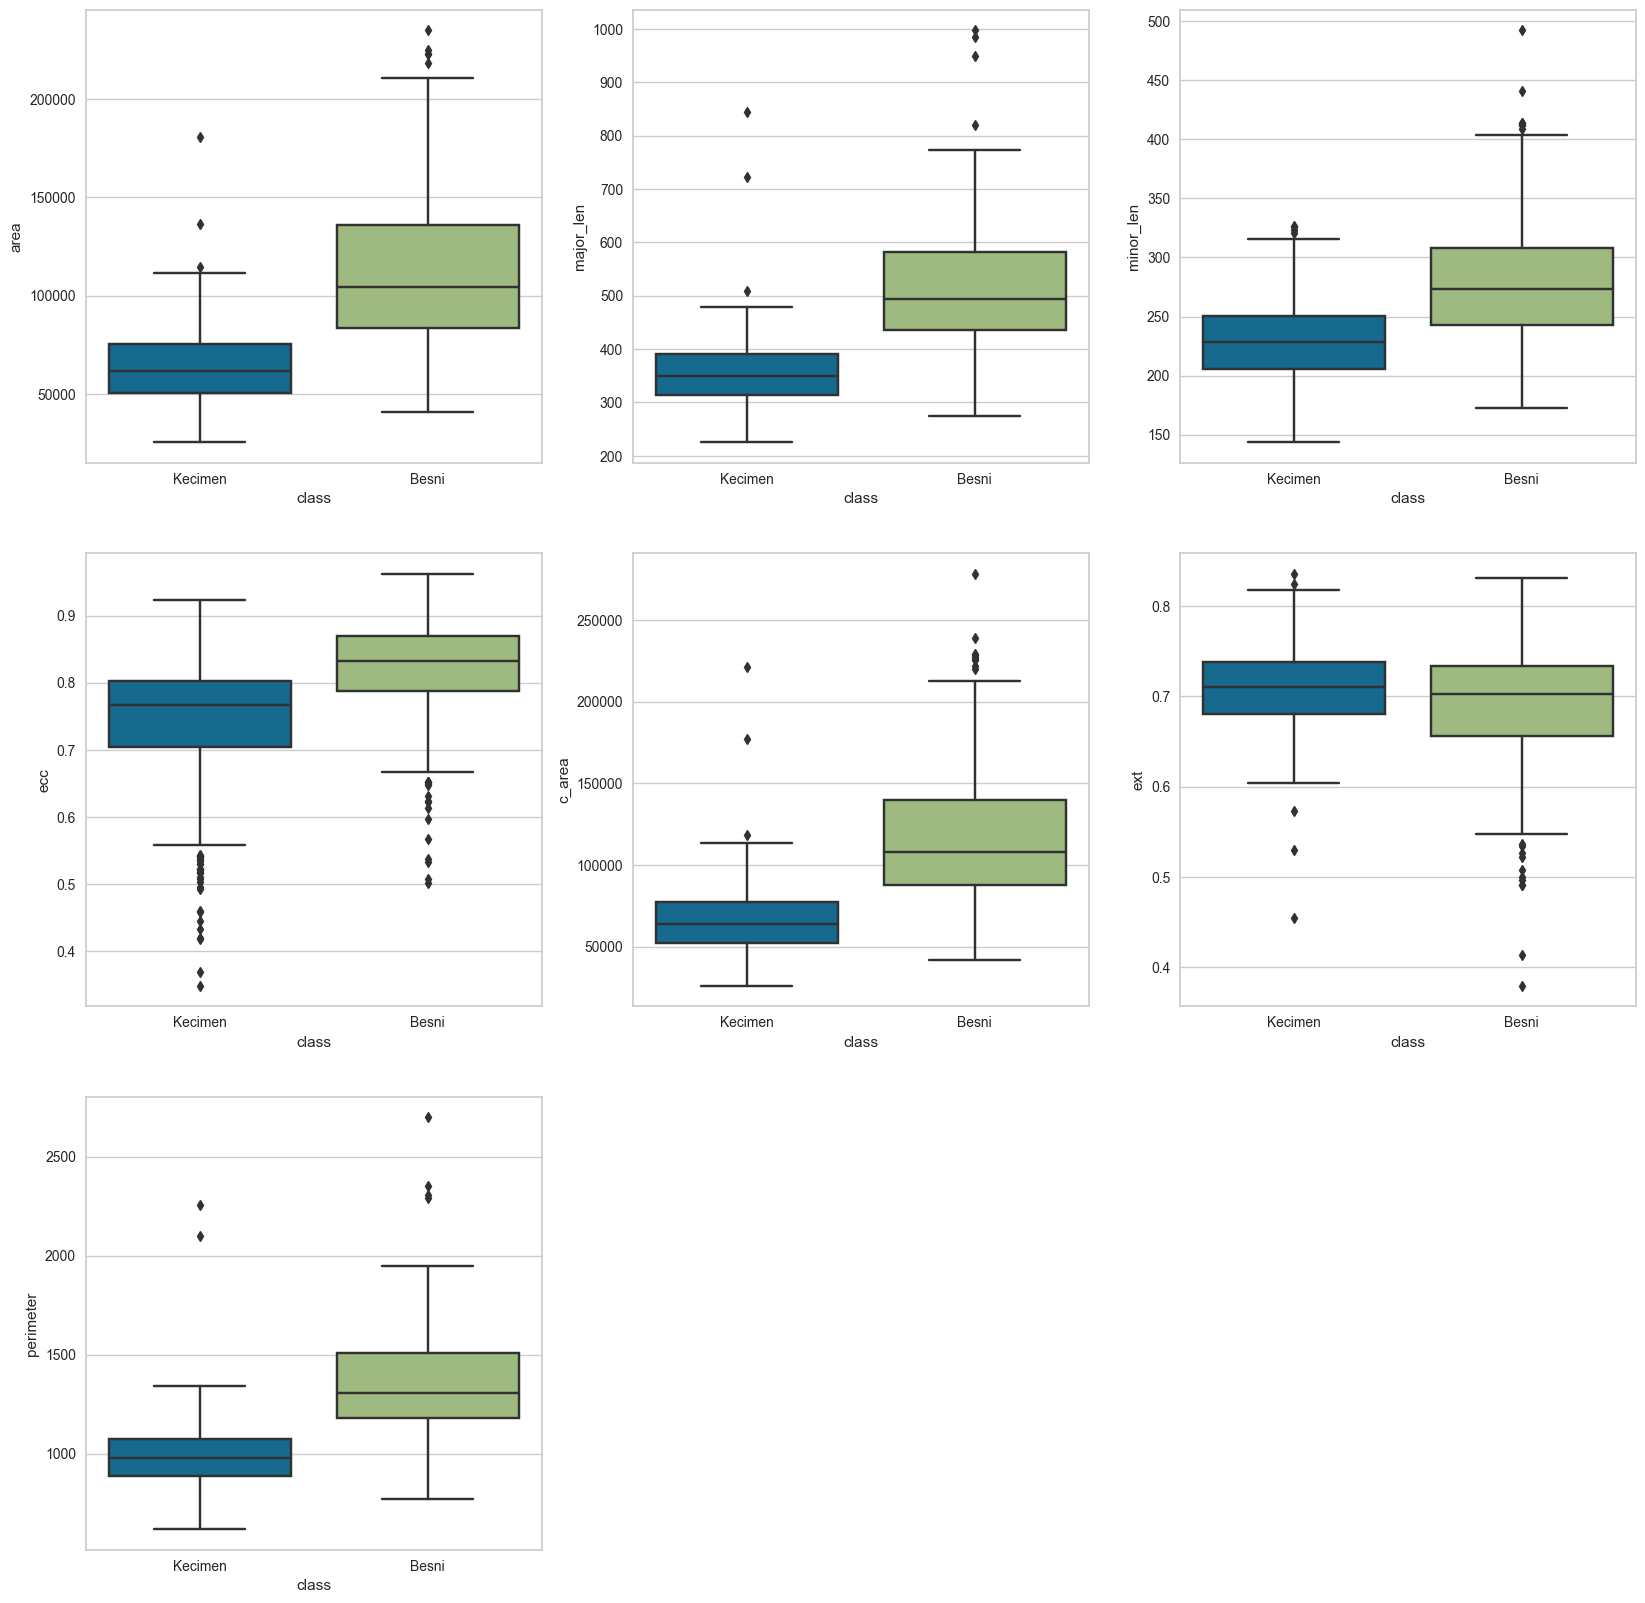

In [15]:
index = 0
plt.figure(figsize=(20,20))
for feature in raisin.columns:
    if feature != "class":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='class',y=feature,data=raisin)
plt.show()

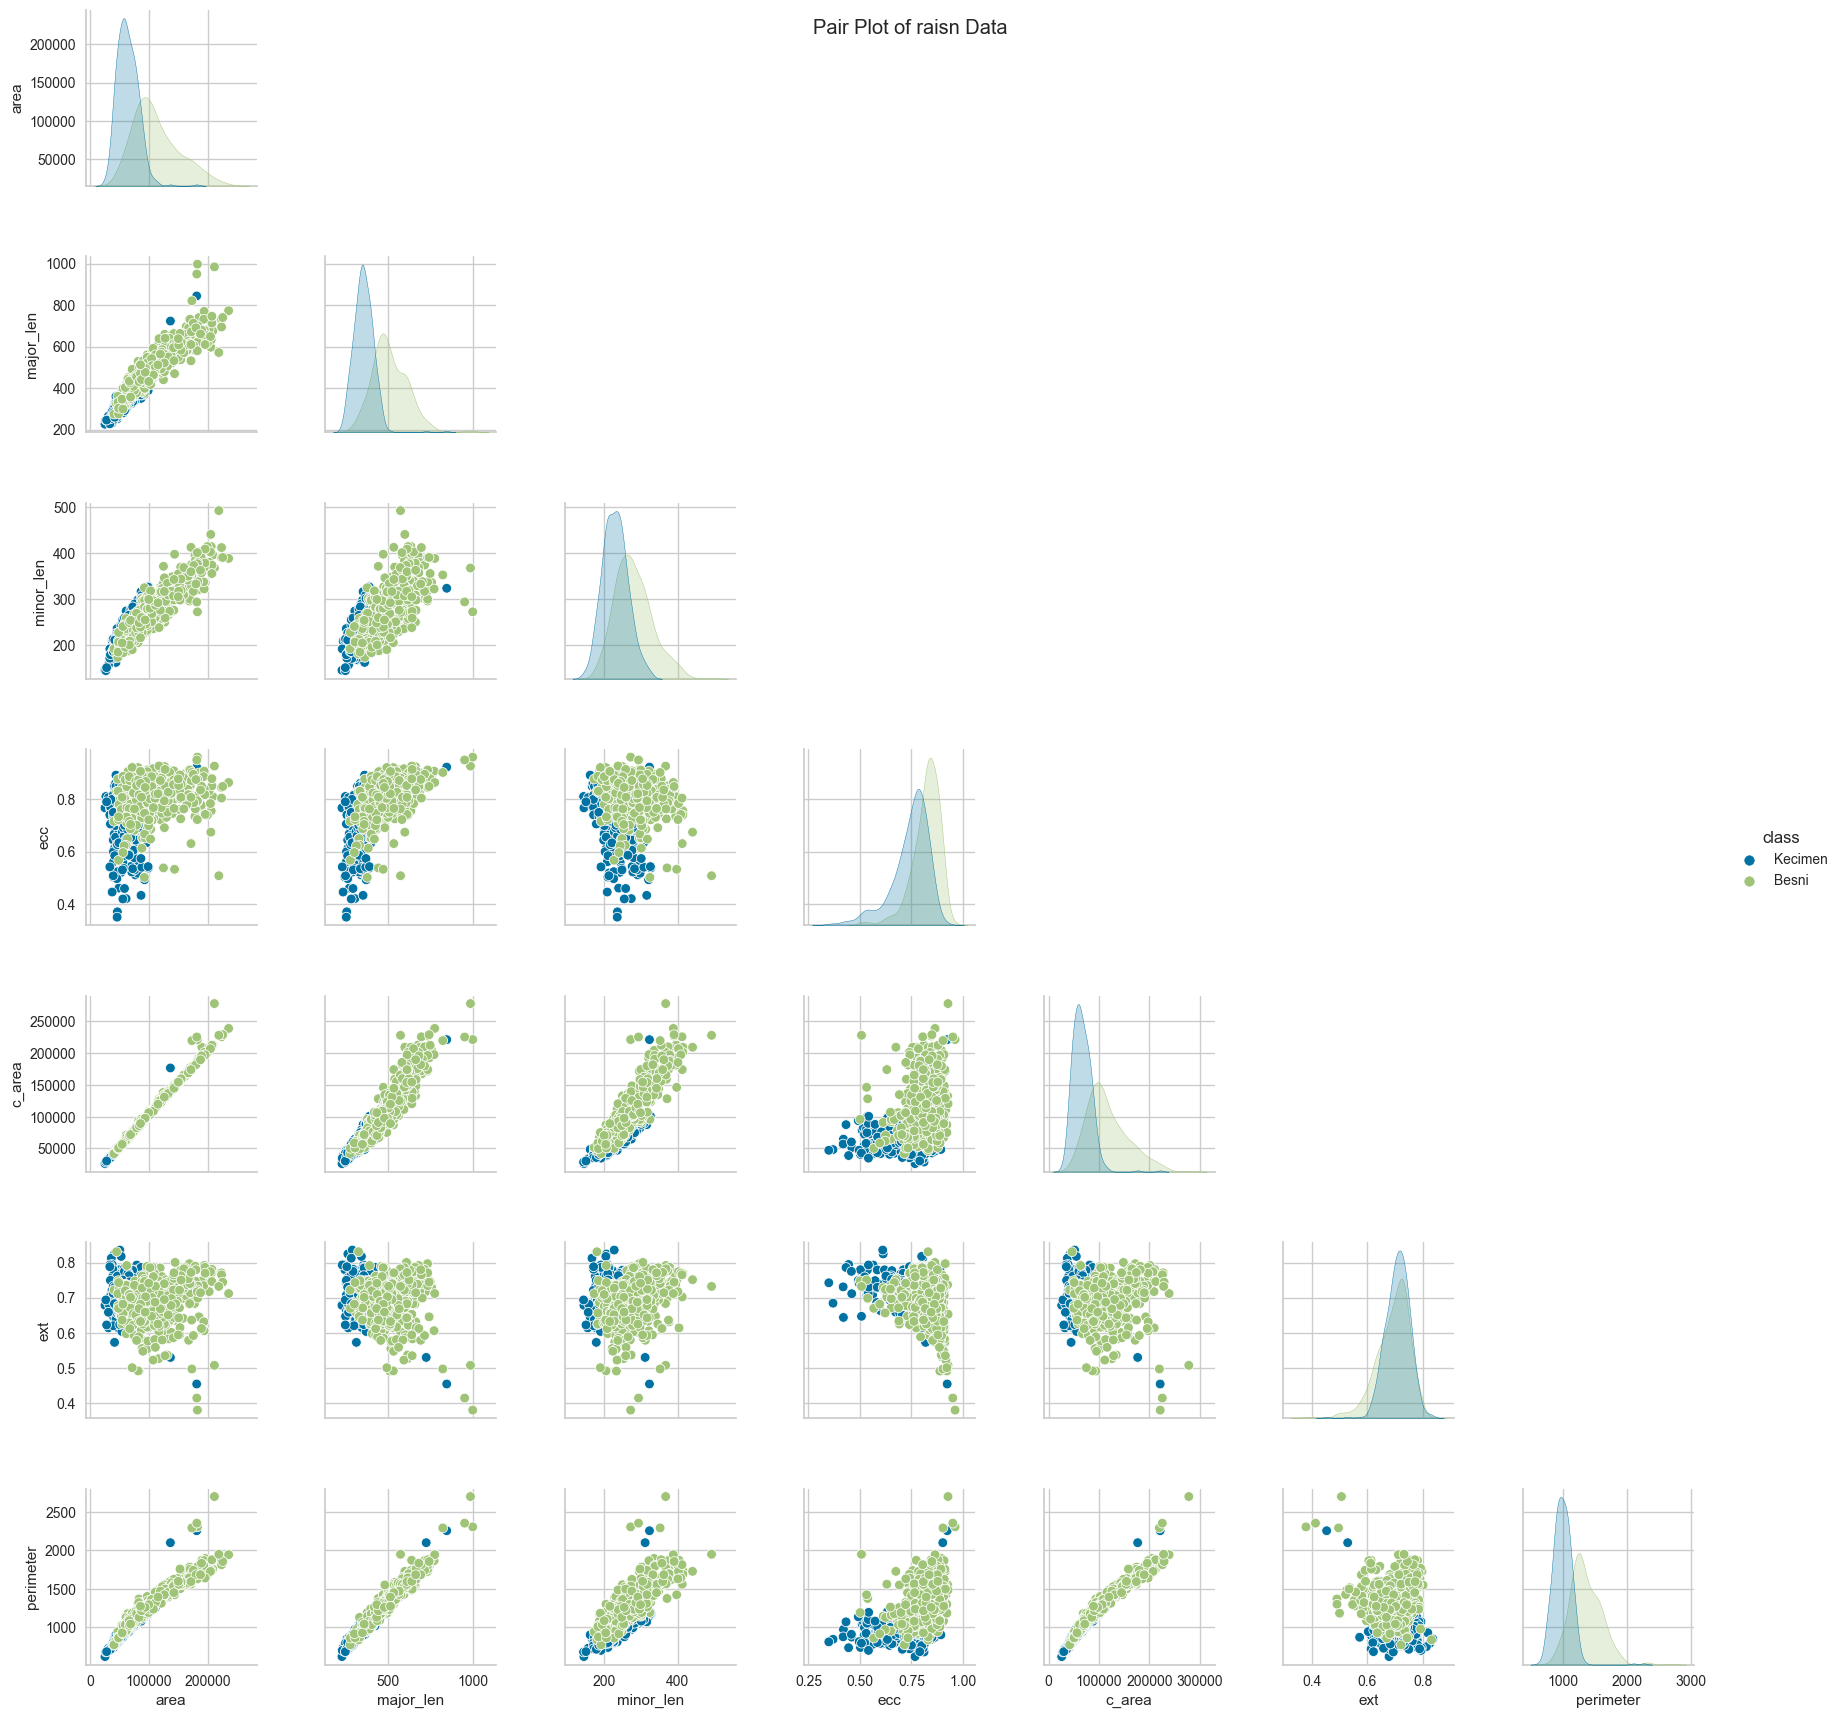

In [17]:
g = sns.pairplot(data=raisin, diag_kind="kde", hue="class")

# Set plot title and axis labels
plt.suptitle("Pair Plot of raisn Data")
plt.xlabel("Variable")
plt.ylabel("Variable")

# Remove upper diagonal subplots
for i, j in zip(*plt.np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].remove()

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Display the plot
plt.show()

In [18]:
def categorize_trans(raisin_):
    if raisin_=="Kecimen":
        return 1
    else:
        return 0
    
raisin['class_10'] = raisin['class'].apply(categorize_trans)
raisin['class'] = raisin['class'].apply(categorize_trans)

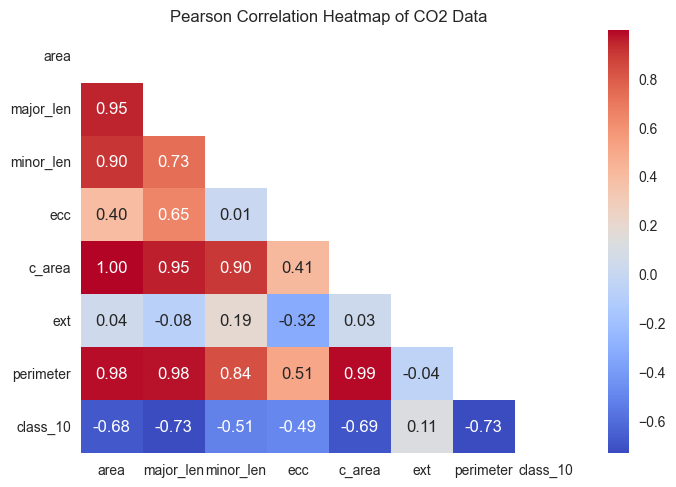

In [19]:
# Create a correlation heatmap
corr_matrix = raisin.drop("class",axis=1).corr(method = "spearman")
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Change colors for upper and lower triangles
sns.heatmap(corr_matrix, mask=mask, cmap="coolwarm", annot=True, fmt=".2f")

# Set plot title
plt.title("Pearson Correlation Heatmap of CO2 Data")

# Display the plot
plt.show()

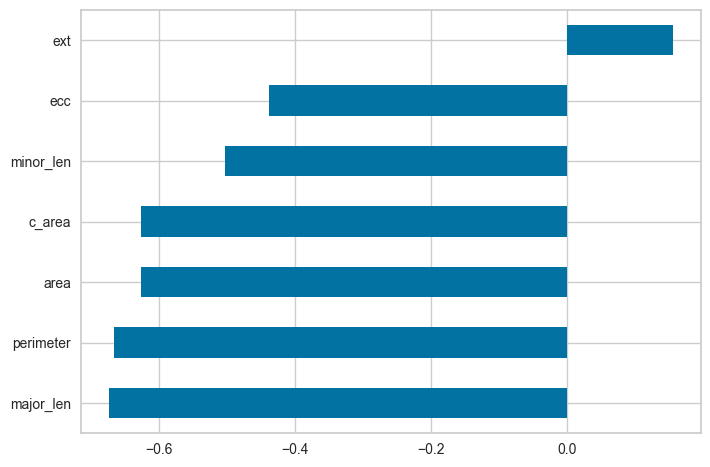

In [20]:
raisin.drop("class",axis=1).corr()["class_10"].drop("class_10").sort_values().plot.barh()
plt.show()

In [21]:
raisin = raisin.drop("class_10", axis=1)

In [22]:
len(raisin[raisin.duplicated()])

0

# 5. Machine Learning Process¶
Logistic Regression

In [23]:
X = raisin.drop(["class"], axis=1)
y = raisin["class"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Scaling the Data

In [25]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training the Model

In [26]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred=log_model.predict(X_test_scaled)
y_pred_proba = log_model.predict_proba(X_test_scaled)
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1]
test_data.sample(10)

area   major_len   minor_len       ecc  c_area       ext  perimeter  \
450  137583  649.541485  273.260282  0.907201  142650  0.731638   1590.354   
888   68799  356.567808  253.254696  0.703943   71879  0.700929   1041.270   
304   61959  339.585018  234.697936  0.722729   64424  0.712041    970.754   
294   70196  373.197647  243.881105  0.756935   71937  0.690790   1024.256   
272   90178  466.249387  250.104302  0.843953   92321  0.752003   1180.478   
498  116406  612.665318  251.832827  0.911615  125638  0.526260   1480.951   
442   58545  325.188636  231.955799  0.700863   60738  0.700500    966.758   
616  199015  615.417236  413.927473  0.740009  201464  0.768570   1687.866   
143   50445  308.358912  208.855245  0.735696   51555  0.723226    851.632   
226   88724  446.430456  260.378754  0.812296   92630  0.656529   1216.535   

     class  pred  pred_proba  
450      0     0    0.002048  
888      0     1    0.822256  
304      1     1    0.893109  
294      1     1    0.779599  
272      1     0    0.290420  
498      0     0    0.003617  
442      1     1    0.909847  
616      0     0    0.002276  
143      1     1    0.961452  
226      1     0    0.240089

Evaluating the Model

In [27]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print()
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Train_Set
[[307  53]
 [ 38 322]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       360
           1       0.86      0.89      0.88       360

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720


Test_Set
[[75 15]
 [12 78]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.85        90
           1       0.84      0.87      0.85        90

    accuracy                           0.85       180
   macro avg       0.85      0.85      0.85       180
weighted avg       0.85      0.85      0.85       180



Cross Validate

In [28]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy              0.872222
test_precision_weighted    0.874672
test_recall_weighted       0.872222
test_f1_weighted           0.871998
dtype: float64

GridSearchCV

In [29]:
log_model = LogisticRegression(max_iter=100000)
penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
solver = ["liblinear"]


param_grid = {"penalty" : penalty,
             "C" : C,
             "solver" : solver}
grid_model = GridSearchCV(log_model, param_grid = param_grid, scoring = "precision", cv=10)
grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=100000),
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='precision')

In [30]:
eval_metric(grid_model,X_train_scaled, y_train, X_test_scaled, y_test)

Train_Set
[[307  53]
 [ 39 321]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       360
           1       0.86      0.89      0.87       360

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720


Test_Set
[[75 15]
 [12 78]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.85        90
           1       0.84      0.87      0.85        90

    accuracy                           0.85       180
   macro avg       0.85      0.85      0.85       180
weighted avg       0.85      0.85      0.85       180



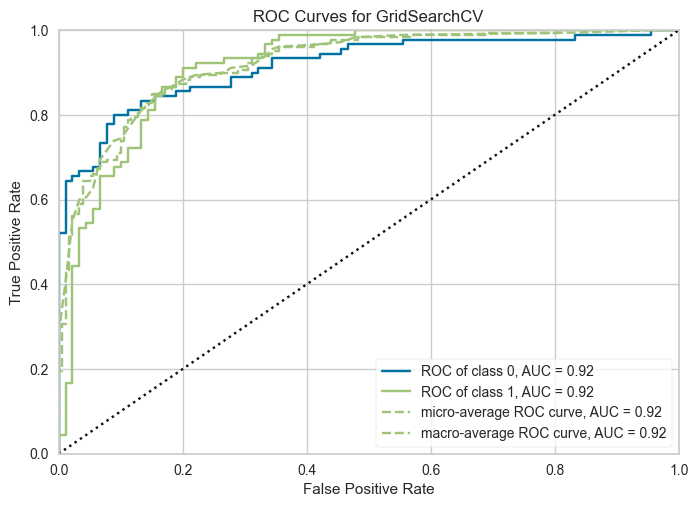

In [31]:
model = grid_model
visualizer = ROCAUC(model)

visualizer.fit(X_train_scaled, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)        # Evaluate the model on the test data
visualizer.show();

In [32]:
y_pred_proba = model.predict_proba(X_test_scaled)
roc_auc_score(y_test, y_pred_proba[:,1])

0.9160493827160494

# Finding Best Threshold for Accuracy 

In [33]:
y_pred_proba = grid_model.predict_proba(X_train_scaled)
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])
fp_tp_th = fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.4808043435573702

In [34]:
y_pred2 = pd.Series(grid_model.predict_proba(X_test_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
eval_metric(grid_model,X_train_scaled, y_train, X_test_scaled, y_test)

Train_Set
[[307  53]
 [ 39 321]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       360
           1       0.86      0.89      0.87       360

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720


Test_Set
[[75 15]
 [12 78]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.85        90
           1       0.84      0.87      0.85        90

    accuracy                           0.85       180
   macro avg       0.85      0.85      0.85       180
weighted avg       0.85      0.85      0.85       180

